In [53]:
import tree_problem_0 as tree

# Do this so that I can update the import file and then run this cell again so it updates here
import imp 
imp.reload(tree)

import matplotlib.pyplot as plt
import time
import scipy.stats as st

In [2]:
# Set the global variables, these will be explained
number_of_iterations = 500 # this number is related to the number of operations - if slow, then reduce this
z_range = 8
r = 0.5 # mean regression coefficient
r_s = 0.9 # standard deviation regression coefficient
mean_gen = 0
sd_gen = 1
k_val = -2
percent_step = 0.33

# plotting
fig_size = (12, 8)

In [3]:
# Let's redefine the parent distribution with the normal number of iterations to make things more accurate
parent_distribution = tree.normal_distribution(number_of_iterations, z_range, mean_gen, sd_gen)

In [4]:
total_offspring_distribution1 = tree.final_superimposed_distribution_all_area_adj(parent_distribution, 1, r_s)

In [5]:
one_distribution = tree.one_offspring_distribution(parent_distribution, 250, r, r_s)
many_distribuitons = tree.offspring_distributions(parent_distribution, r, r_s)

In [ ]:
super_distribution = tree.superimposed_offspring_distribution(many_distribuitons)
super_par_inc_distribution = tree.normalized_superimposed_distribution_to_parent_increment(super_distribution)

In [ ]:
print('PARENT')
print(parent_distribution[0], '\n')
# parent_dist_len = len(parent_distribution)
# print(parent_dist_len)
# parent_mid_index = (parent_dist_len - 1) // 2
# print(parent_distribution[parent_mid_index])

print('ONE OFFSPRING')
print(one_distribution[0])
print('(add parent mean to the end)\n')

print('MANY OFFSPRING')
print(many_distribuitons[0][0])
print('(add parent area to the end)\n')

print('SUPER DISTRIBUTION')
print(super_distribution[0])
print('(reorder things, add parent number and parent bound)\n')

print('SUPER PARENT INC DISTRIBUTION')
print(super_par_inc_distribution[0])
print('(do nothing)\n')

print('TOTAL')
print(total_offspring_distribution1[0])
print('(do nothing)\n')

# offspring_dist_len = len(total_offspring_distribution1)
# print(offspring_dist_len)
# offspring_mid_index = (offspring_dist_len - 1) // 2
# offspring_mean = total_offspring_distribution1[offspring_mid_index][0]
# print(offspring_mid_index)
# print(offspring_mean)

In [24]:
total_offspring_distribution1

[[-8.0,
  4.875478034610425e-11,
  ['increment', 0.016],
  ['parent increment', 0.016],
  ['parent mean', 0],
  ['parent area', 0.999938775960854],
  ['parent number', 500],
  ['parent bound', 8.0]],
 [-7.984, 1.0472539625073162e-10],
 [-7.968, 1.686837570491472e-10],
 [-7.952, 2.414721680492171e-10],
 [-7.936, 3.240090672575477e-10],
 [-7.92, 4.1729518639634245e-10],
 [-7.904, 5.224201647329007e-10],
 [-7.888, 6.405696459714557e-10],
 [-7.872, 7.730328902772457e-10],
 [-7.856, 9.212109354195515e-10],
 [-7.84, 1.08662534303821e-09],
 [-7.824, 1.2709275681613835e-09],
 [-7.808, 1.4759089923357012e-09],
 [-7.792, 1.7035116630781496e-09],
 [-7.776, 1.9558397848271907e-09],
 [-7.76, 2.2351720091636715e-09],
 [-7.744, 2.5439745747954296e-09],
 [-7.728, 2.8849153506585335e-09],
 [-7.712, 3.2608788384884716e-09],
 [-7.696, 3.674982194362036e-09],
 [-7.68, 4.130592332011202e-09],
 [-7.664, 4.631344174169983e-09],
 [-7.648, 5.181160121840489e-09],
 [-7.632, 5.784270815161516e-09],
 [-7.616, 6.4

0.9994804234849239

In [43]:
n_iterations_large = 500
parent_distribution_im = tree.normal_distribution(n_iterations_large, z_range, mean_gen, sd_gen)

In [44]:
percent_step = 0.333
start = time.time()

step_percentile_five = tree.step_proportion_destined_percentile(parent_distribution_im, r, r_s, percent_step)

end = time.time()
print(end - start)

4.089804172515869


In [45]:
start = time.time()

tree.step_proportion_attributable_percentile(parent_distribution_im, r, r_s, percent_step)

end = time.time()
print(end - start)

2.629847764968872


In [46]:
start = time.time()


print(tree.proportion_destined_percentile(parent_distribution_im, r, r_s, 0, 0.2, 0.8, 1.0))

end = time.time()
print(end - start)

0.04788763534744698
0.5795478820800781


In [48]:
start = time.time()

print(tree.proportion_attributable_percentile(parent_distribution_im, r, r_s, 0, 0.2, 0.8, 1.0))
end = time.time()
print(end - start)

0.04655825125727188
1.107635259628296


In [49]:
error_500 = 12.88387356225678 / 12.24162402732729
error_1000 = 25.83701167962977 / 24.869717301026885
error_2000 = 51.74334249467942 / 50.12570602236689

print(error_500)
print(error_1000)
print(error_2000)

1.0524644061519761
1.038894466185305
1.0322715947699712


In [54]:
point_eight = st.norm.ppf(0.80)
one_point = 4
point_four = st.norm.ppf(0.4)
point_six = st.norm.ppf(0.60)

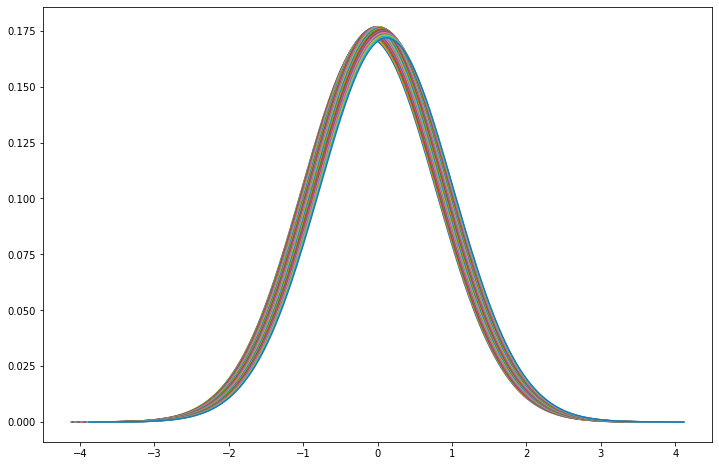

In [55]:
plt.figure(figsize=fig_size)
plt.xlim(-4.5, 4.5)
dis_dest = tree.offspring_distributions(parent_distribution, r, r_s, above_k_v_p=point_four, below_k_v_p=point_six)
tree.plot_distributions(dis_dest)

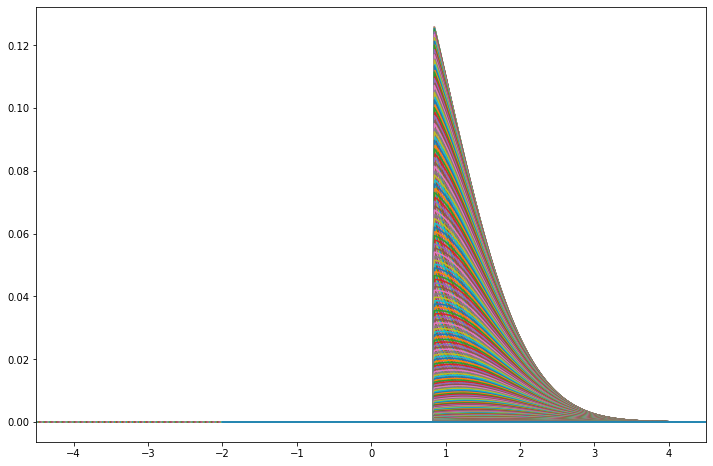

In [56]:
plt.figure(figsize=fig_size)
plt.xlim(-4.5, 4.5)
dis_att = tree.offspring_distributions(parent_distribution, r, r_s, above_k_v_o=point_eight, below_k_v_o=one_point)
tree.plot_distributions(dis_att)

In [57]:
len(dis_dest)

31

In [58]:
len(dis_att)

501

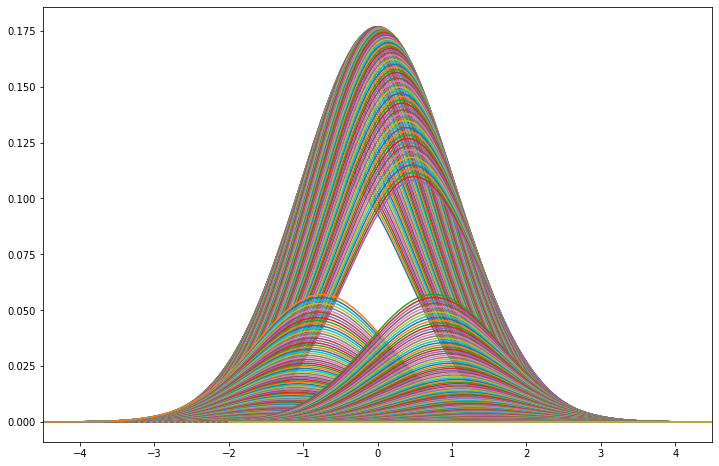

In [59]:
plt.figure(figsize=fig_size)
plt.xlim(-4.5, 4.5)
tree.plot_distributions(tree.offspring_distributions(parent_distribution_im, r, r_s, above_k_v_p=-1, below_k_v_p=1))
tree.plot_distributions(tree.offspring_distributions(parent_distribution_im, r, r_s, above_k_v_p=-4, below_k_v_p=-1.5))
tree.plot_distributions(tree.offspring_distributions(parent_distribution_im, r, r_s, above_k_v_p=1.5, below_k_v_p=4))

# plt.savefig('cool_dist.png', dpi=300)


In [62]:
n_parents_a = 1000
n_normal_a = 1000

n_att = n_parents_a * n_normal_a
n_att

1000000

In [64]:
n_parents_d = 250
n_normal_d = 1000
n_des = n_parents_d * n_normal_d
n_des

250000

In [65]:
n_att / n_des

4.0

Add proportion attributable stepwise, find some good way of showing it. I'm thinking of five boxplots, or maybe a stack plot? **DONE**

We need to make sure that it's also a good way of displaying the proportion destined stepwise. **DONE**

We also need to talk about how the mean reg coeff is the actually a product of the inheritance coefficient and the parents correlation coefficient.

Also, graph of r and r_s that maintain size of offspring